# Titanic - Machine Learning from Disaster

### Predicting survival on the Titanic

![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

#### Data Dictionary
|Variable|Definition|Key|
|--------|----------|---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|
|Age|	Age in years|	
|sibsp	|# of siblings / spouses aboard the Titanic	|
|parch	|# of parents / children aboard the Titanic	|
|ticket	|Ticket number	|
|fare	|Passenger fare	|
|cabin	|Cabin number	|
|embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton|

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [3]:
df.shape

(891, 12)

## Data Preprocessing

In [4]:
#removing the columns
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#checking data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [7]:
#checking for unique value count
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [8]:
#checking for missing value count
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### Refining the data

In [9]:
# replacing the missing values
df['Age'] =  df['Age'].replace(np.nan,df['Age'].median(axis=0))
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

In [10]:
#type casting Age to integer
df['Age'] = df['Age'].astype(int)

In [11]:
#replacing with 1 and female with 0
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

#### Categorising in groups i.e. Infant(0-5), Teen (6-20), 20s(21-30), 30s(31-40), 40s(41-50), 50s(51-60), Elder(61-100)

In [12]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
df['Age'] = pd.cut(x=df['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])

## Exploratory Data Analysis

#### Plotting the Countplot to visualize the numbers

<Axes: xlabel='Parch', ylabel='count'>

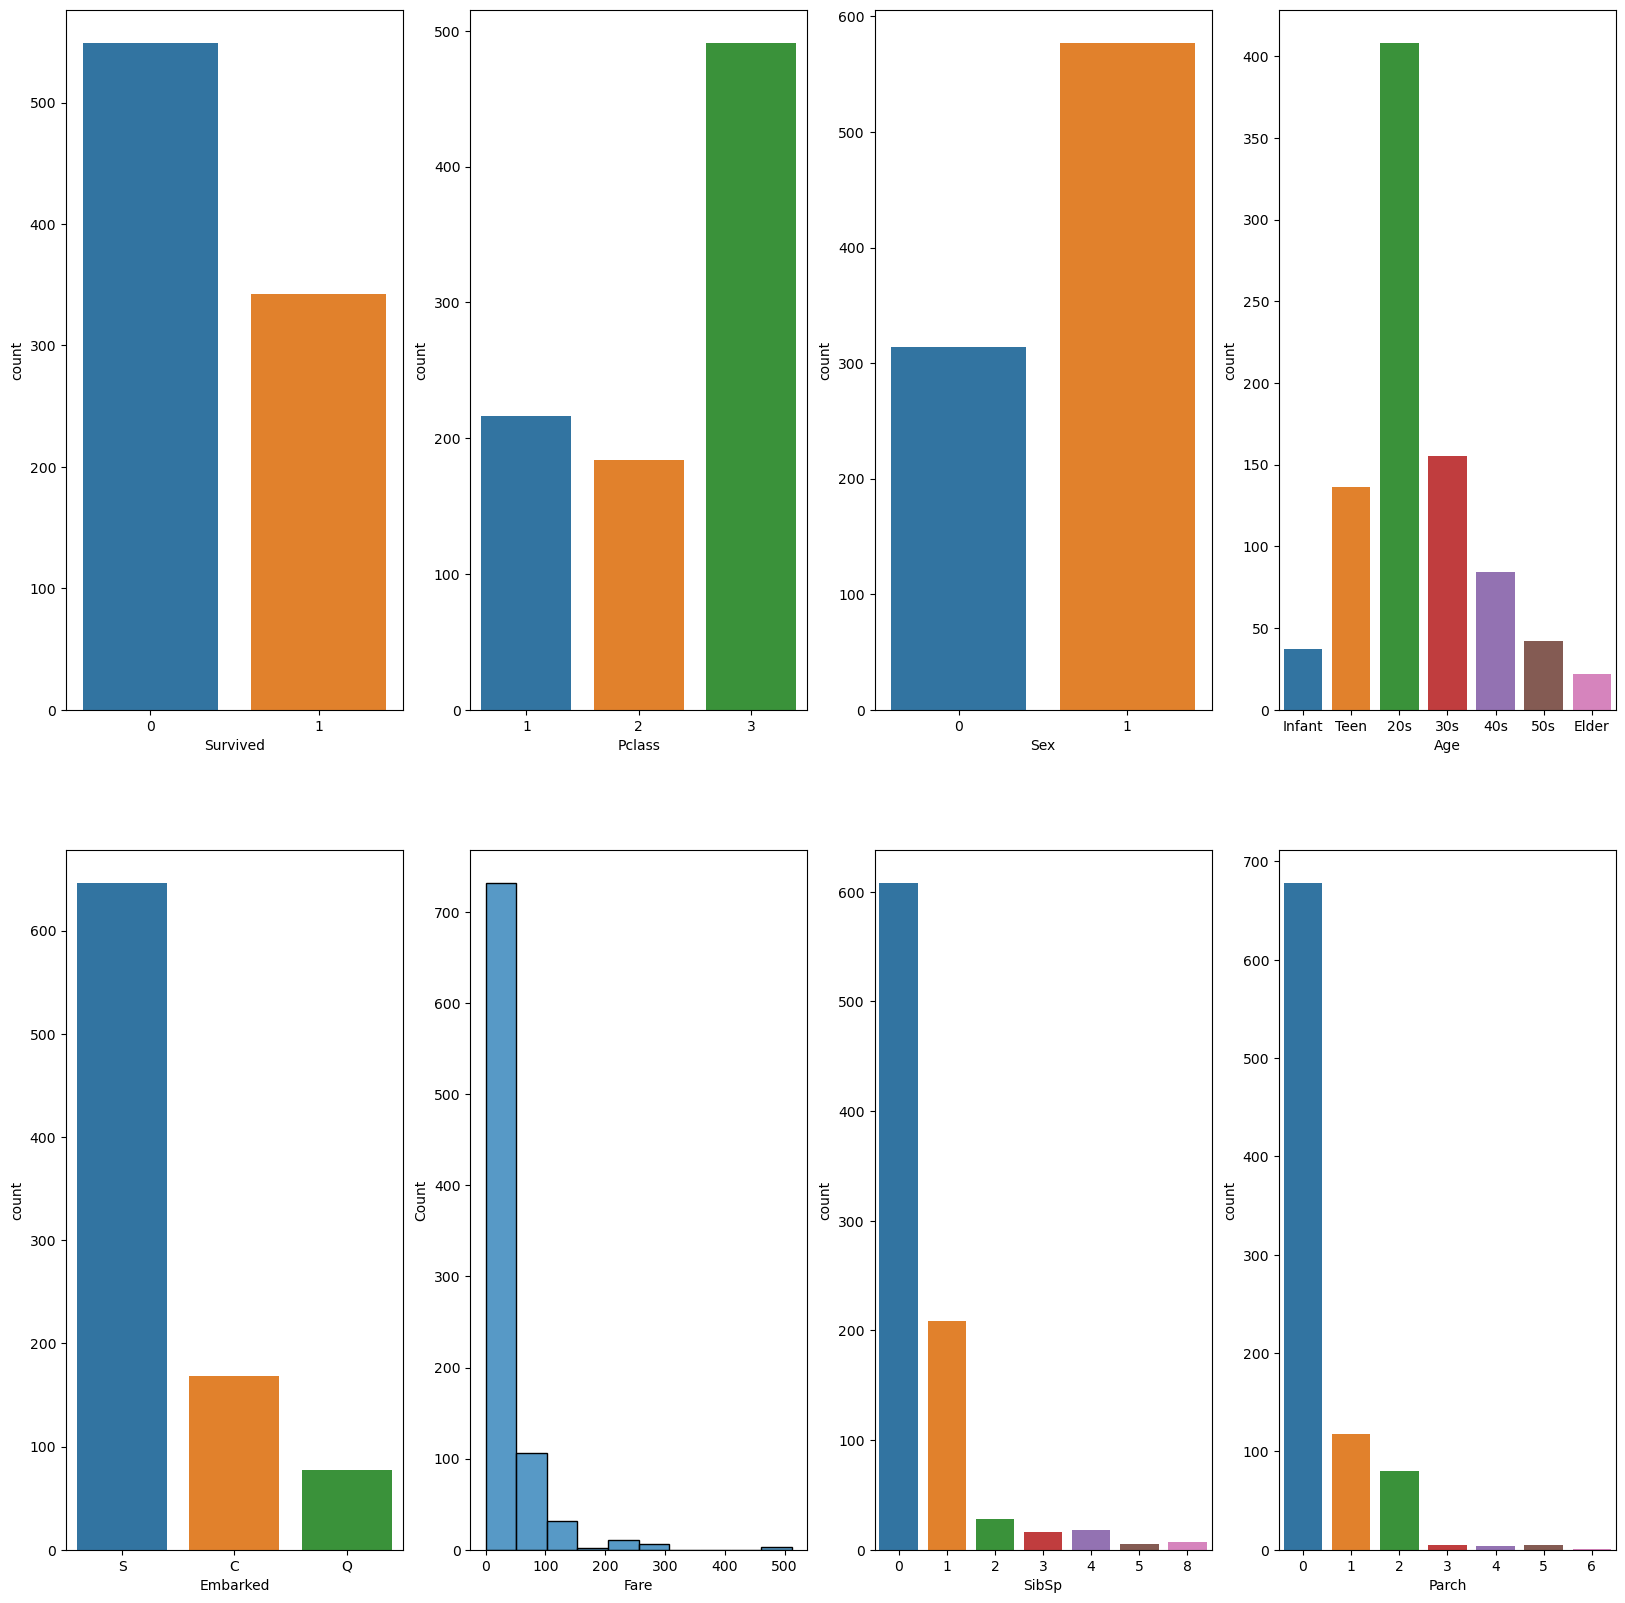

In [13]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2])
sns.countplot(x = 'Parch', data = df, ax=ax[1,3])

#### Visualizing the replationship between the features

<Axes: xlabel='Pclass', ylabel='Survived'>

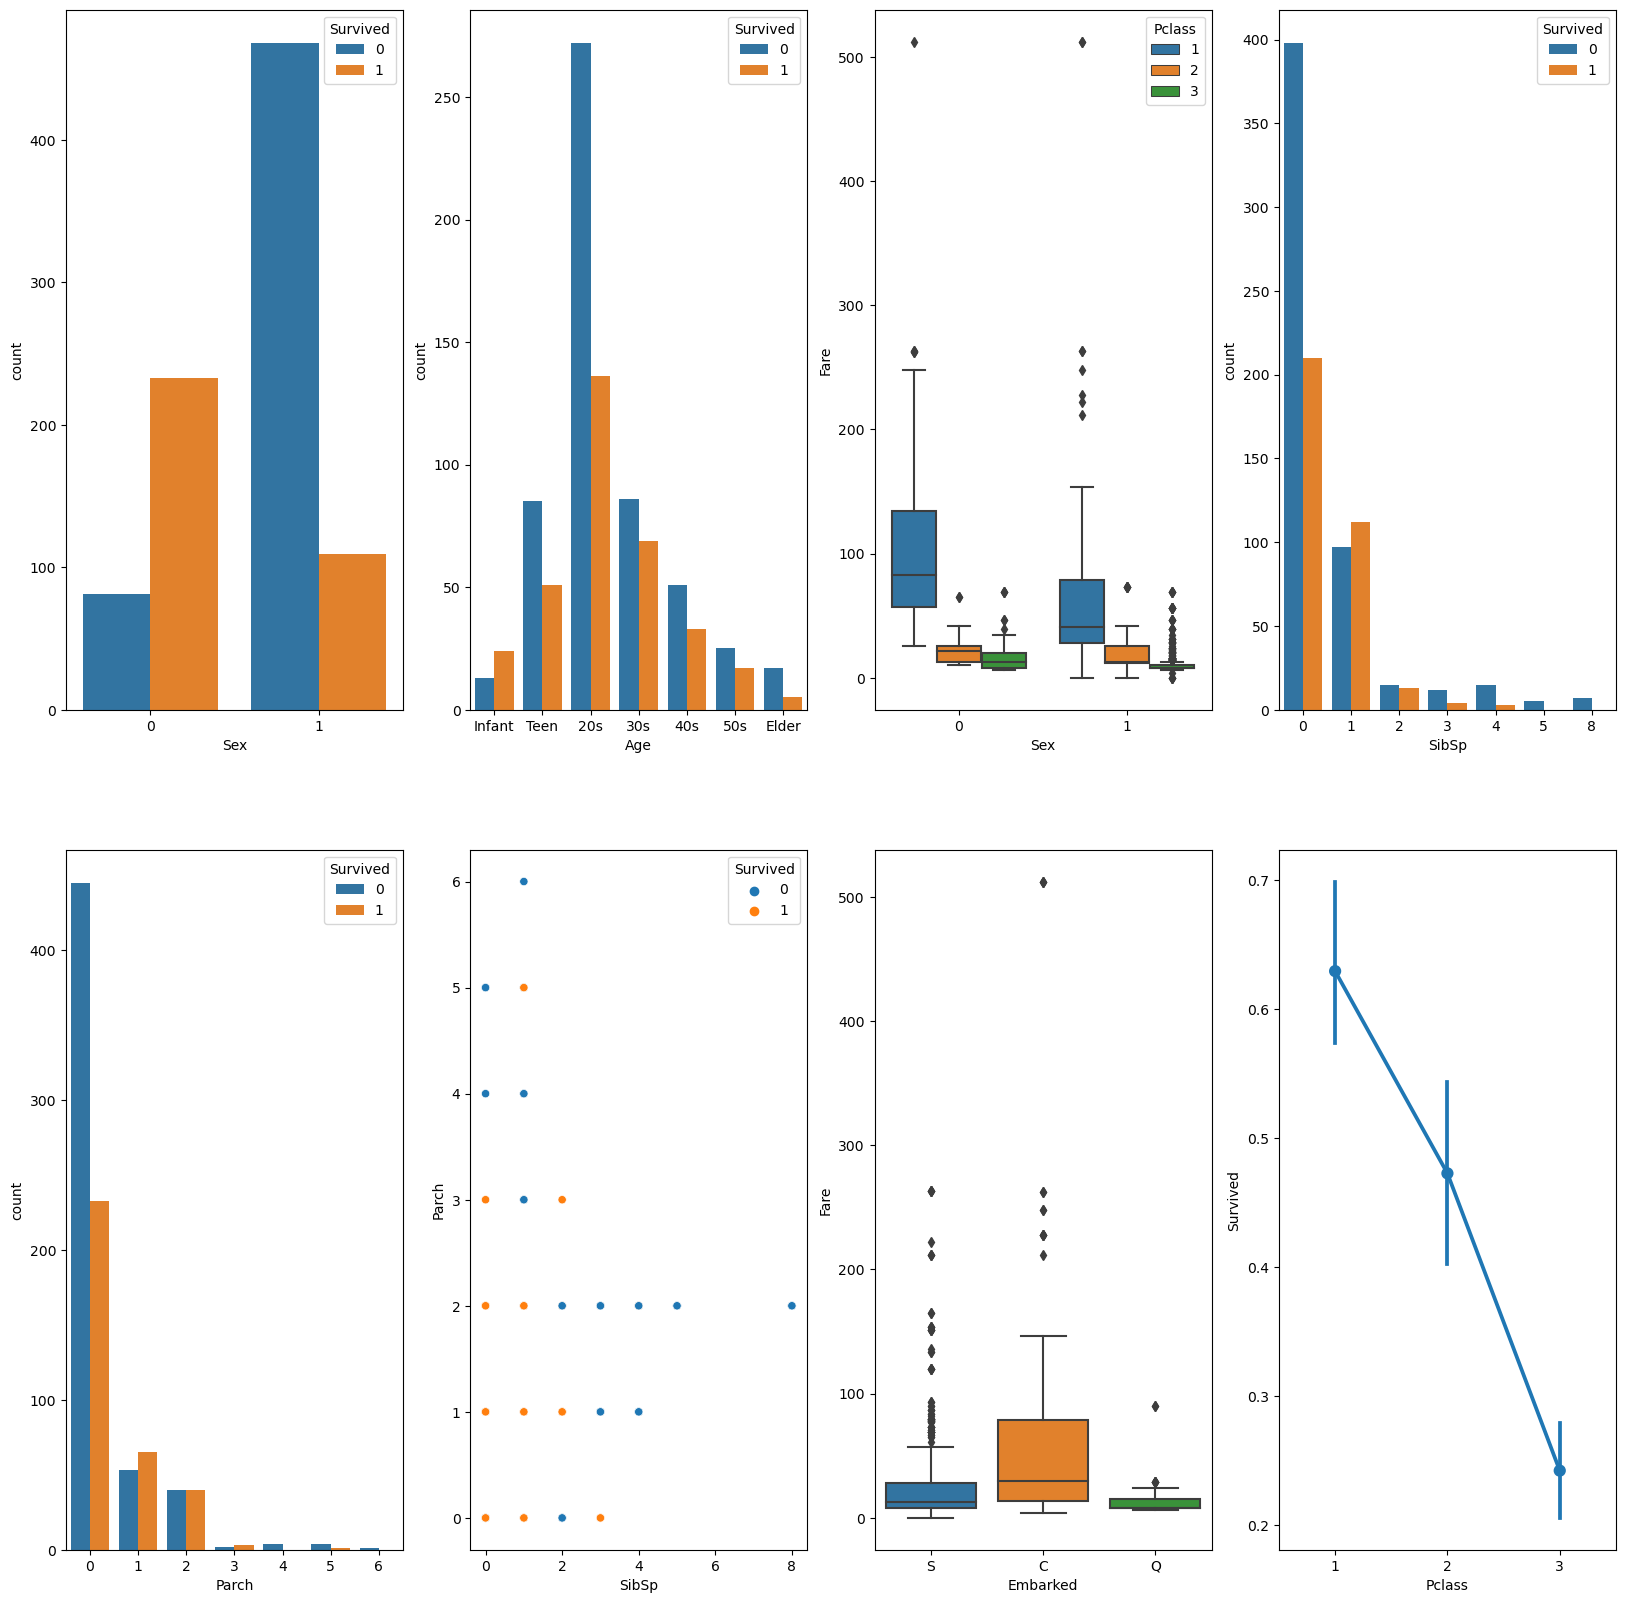

In [14]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

## Data Preprocessing 2

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [16]:
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

#### Coorelation Heatmap

<Axes: >

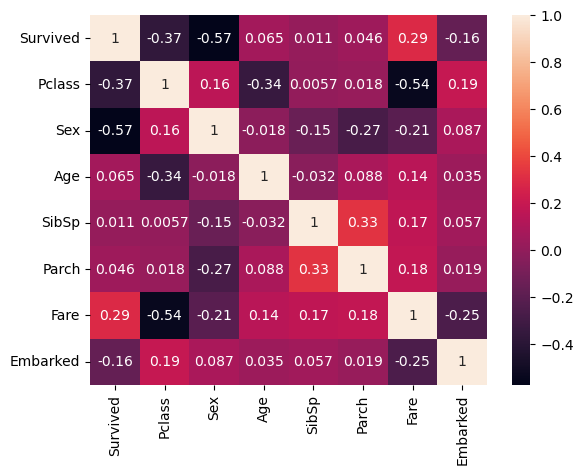

In [17]:
sns.heatmap(df.corr(), annot= True)

#### Separating the target and independent variable

In [18]:
y = df['Survived']
x = df.drop(columns=['Survived'])

## Model Training

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [20]:
lr.fit(x,y)
lr.score(x,y)

0.818577648766328

### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [22]:
dtree.fit(x,y)
dtree.score(x,y)

0.9404934687953556

### Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
svm = SVC()
svm

SVC()

In [24]:
svm.fit(x,y)
svm.score(x,y)

0.7024673439767779

### K-Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn


KNeighborsClassifier()

In [26]:
knn.fit(x,y)
knn.score(x,y)

0.8127721335268505

#### From the above four model Decision Tree Classifier has the highest Training accuracy, so only Decision Tree Classifier will work on the Test Set.

### Importing the test set

In [27]:
df2 = pd.read_csv('titanic_test.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
#removing the columns
df2 = df2.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)

## Data Preprocessing the Test set

In [29]:
df2['Age'] =  df2['Age'].replace(np.nan,df2['Age'].median(axis=0))
df2['Embarked'] = df2['Embarked'].replace(np.nan, 'S')

In [30]:
#type casting Age to integer
df2['Age'] = df2['Age'].astype(int)

In [31]:
#replacing with 1 and female with 0
df2['Sex'] = df2['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [32]:
df2['Age'] = pd.cut(x=df2['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = [0,1,2,3,4,5,6])

In [33]:
le.fit(['S','C','Q'])
df2['Embarked'] = le.transform(df2['Embarked'])

In [34]:
df2.dropna(subset=['Age'], axis= 0, inplace = True)

In [35]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7.2500,2
1,1,1,0,3,1,0,71.2833,0
2,1,3,0,2,0,0,7.9250,2
3,1,1,0,3,1,0,53.1000,2
4,0,3,1,3,0,0,8.0500,2


### Separating the traget and independent variable

In [36]:
x = df2.drop(columns=['Survived'])
y = df2['Survived']

## Predicting using Decision Tree Classifier

In [37]:
tree_pred = dtree.predict(x)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y, tree_pred)

0.8970588235294118

#### Confusion Matrix

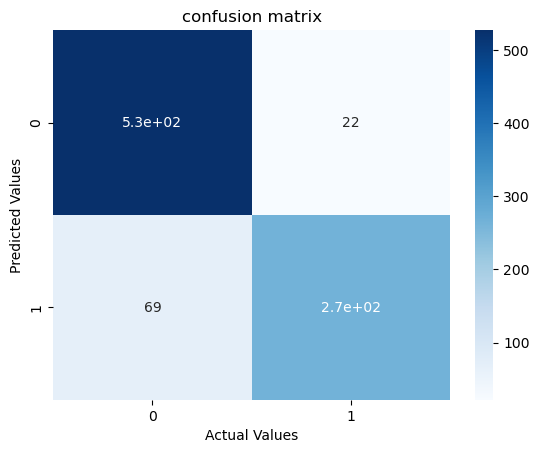

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y,tree_pred),annot= True, cmap = 'Blues')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()